<a href="https://colab.research.google.com/github/nmolina1982/Proyecto-Aurelion-/blob/main/Proyecto_Aurelion_Sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis Exploratorio Tienda Aurelion (Sprint 2)

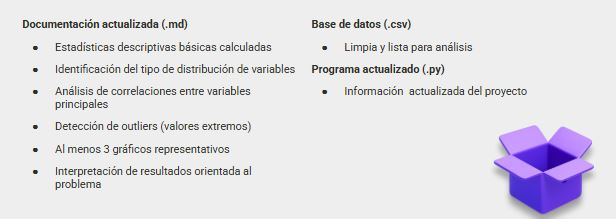

In [ ]:
# ============================================
# Proyecto Aurelion - Sprint 2
# Autor: Nicolás Molina
# Fecha: Noviembre 2025
# ============================================

# --- Importar librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde   # <-- Faltaba esta
import gdown
import os

# Configuración de estilo para gráficos
plt.style.use('ggplot')

# Paleta personalizada (creada por vos)
custom_palette = ['#BE99F2', '#8268A6', '#5936D9']
sns.set_palette(custom_palette)

print("✅ Librerías y estilo cargados correctamente")



✅ Librerías y estilo cargados correctamente


In [ ]:
sns.color_palette()


[(0.7450980392156863, 0.6, 0.9490196078431372),
 (0.5098039215686274, 0.40784313725490196, 0.6509803921568628),
 (0.34901960784313724, 0.21176470588235294, 0.8509803921568627)]

1. Cargar las bases de datos

In [ ]:
# ===============================
# FILE IDs
# ===============================
FILEID_CLIENTES = "1MOekiULKk02cU1tFwnhEDsR_wU6T4xK6"
FILEID_PRODUCTOS = "1eksQJxpCslFnVNaFpvS1yoZcxpz8Cd8v"
FILEID_VENTAS = "1lAFmQKClM2tnDLdaxdej0RKEpW4pvSd4"
FILEID_DETALLE = "1ECinjjDvVcRTcEyLM0rFiBWJy4FnIOgi"

# ===============================
# DESCARGA AUTOMÁTICA DE ARCHIVOS
# ===============================
gdown.download(f"https://drive.google.com/uc?export=download&id={FILEID_CLIENTES}",
               "clientes.xlsx", quiet=False)

gdown.download(f"https://drive.google.com/uc?export=download&id={FILEID_PRODUCTOS}",
               "productos.xlsx", quiet=False)

gdown.download(f"https://drive.google.com/uc?export=download&id={FILEID_VENTAS}",
               "ventas.xlsx", quiet=False)

gdown.download(f"https://drive.google.com/uc?export=download&id={FILEID_DETALLE}",
               "detalle_ventas.xlsx", quiet=False)

print("Archivos descargados:")
print(os.listdir())

# ===============================
# CARGA DE ARCHIVOS A DATAFRAMES
# ===============================
clientes = pd.read_excel("clientes.xlsx")
productos = pd.read_excel("productos.xlsx")
ventas = pd.read_excel("ventas.xlsx")
detalle_ventas = pd.read_excel("detalle_ventas.xlsx")

# Verificación
print("Clientes:", clientes.shape)
print("Productos:", productos.shape)
print("Ventas:", ventas.shape)
print("Detalle Ventas:", detalle_ventas.shape)


Downloading...
From: https://drive.google.com/uc?export=download&id=1MOekiULKk02cU1tFwnhEDsR_wU6T4xK6
To: /content/clientes.xlsx
100%|██████████| 8.60k/8.60k [00:00<00:00, 20.8MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1eksQJxpCslFnVNaFpvS1yoZcxpz8Cd8v
To: /content/productos.xlsx
100%|██████████| 8.13k/8.13k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1lAFmQKClM2tnDLdaxdej0RKEpW4pvSd4
To: /content/ventas.xlsx
100%|██████████| 9.48k/9.48k [00:00<00:00, 21.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1ECinjjDvVcRTcEyLM0rFiBWJy4FnIOgi
To: /content/detalle_ventas.xlsx
100%|██████████| 16.3k/16.3k [00:00<00:00, 31.4MB/s]

Archivos descargados:
['.config', 'ventas.xlsx', 'clientes.xlsx', 'productos.xlsx', 'detalle_ventas.xlsx', 'sample_data']
Clientes: (100, 5)
Productos: (100, 4)
Ventas: (120, 6)
Detalle Ventas: (343, 6)


2. Limpieza y normalización de datos

In [ ]:
# --- Normalizar nombres de columnas ---
for df in [clientes, productos, ventas, detalle_ventas]:
    df.columns = df.columns.str.lower().str.replace(" ", "_")

# --- Eliminar duplicados ---
clientes = clientes.drop_duplicates()
productos = productos.drop_duplicates()
ventas = ventas.drop_duplicates()
detalle_ventas = detalle_ventas.drop_duplicates()

# --- Revisar valores nulos ---
print("Valores nulos por tabla:")
for nombre, df in zip(["Clientes", "Productos", "Ventas", "Detalle Ventas"],
                      [clientes, productos, ventas, detalle_ventas]):
    print(f"\n{nombre}:\n", df.isnull().sum())


Valores nulos por tabla:

Clientes:
 id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

Productos:
 id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64

Ventas:
 id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

Detalle Ventas:
 id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            0
dtype: int64


In [ ]:
# --- Corrección automática de categorías según palabras clave ---
productos.loc[
    productos['nombre_producto'].str.contains(
        'queso|pan|arroz|pepsi|fanta|jugo|intensa|té|entera|natural|medialunas|galletitas|alfajor|papas|maní|chocolate|turrón|dulce|mermelada|helado|vinagre|lentejas|porotos|azúcar|caramelos|chupetín|stevia|avena|cerveza|vino|fernet|ron|whisky|pizza|verdura|aceitunas',
        case=False
    ),
    'categoria'
] = 'Alimentos'

productos.loc[
    productos['nombre_producto'].str.contains(
        'lavandina|detergente|jabón|shampoo|servilleta|cepillo|mascarilla|limpiavidrios|esponjas|desodorante|toalla|pañal|desinfectante|limpiador|cloro|trapo|esponja',
        case=False
    ),
    'categoria'
] = 'Limpieza'

print("✅ Categorías corregidas exitosamente")

✅ Categorías corregidas exitosamente


In [ ]:
# Verificar los cambios

productos['categoria'].value_counts()

,count
categoria,
Alimentos,81
Limpieza,19


In [ ]:
#Revisar visualmente los resultados corregidos

productos[productos['nombre_producto'].str.contains('queso|lavandina|shampoo|galletitas', case=False)]

,id_producto,nombre_producto,categoria,precio_unitario
16,17,Queso Cremoso 500g,Alimentos,4834
17,18,Queso Rallado 150g,Alimentos,3444
23,24,Galletitas Chocolate,Alimentos,1305
24,25,Galletitas Vainilla,Alimentos,4015
52,53,Lavandina 1L,Limpieza,1664
54,55,Shampoo 400ml,Limpieza,1407
82,83,Queso Untable 190g,Alimentos,1830
83,84,Queso Azul 150g,Alimentos,1645


3. Actualizar el DataFrame consolidado

In [ ]:
# --- Reconstruir la base consolidada con categorías actualizadas ---
df = detalle_ventas.merge(ventas, on="id_venta", how="left")
df = df.merge(productos, on="id_producto", how="left")  # productos ya corregido
df = df.merge(clientes, on="id_cliente", how="left")

if 'importe' not in df.columns:
    df['importe'] = df['cantidad'] * df['precio_unitario']

df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

print("✅ Base consolidada actualizada con categorías corregidas")

✅ Base consolidada actualizada con categorías corregidas


4. Consolidar la base de datos

In [ ]:
# --- Unir tablas ---
df = detalle_ventas.merge(ventas, on="id_venta", how="left")
df = df.merge(productos, on="id_producto", how="left", suffixes=("", "_prod"))
df = df.merge(clientes, on="id_cliente", how="left", suffixes=("", "_cli"))

# Ahora quedan columnas como:
# nombre_producto (detalle)   VS   nombre_producto_prod
# nombre_cliente (ventas)     VS   nombre_cliente_cli
# email (ventas)              VS   email_cli

# --- ELIMINAR columnas duplicadas y quedarse con las correctas ---
columnas_a_borrar = [
    "nombre_producto",        # del detalle (incorrecto)
    "precio_unitario",        # del detalle (incorrecto)
    "nombre_cliente",         # del detalle/ventas (menos preciso)
    "email"                   # del detalle/ventas
]

df = df.drop(columns=columnas_a_borrar, errors='ignore')

# --- RENOMBRAR las columnas correctas ---
df = df.rename(columns={
    "nombre_producto_prod": "nombre_producto",
    "precio_unitario_prod": "precio_unitario",
    "nombre_cliente_cli": "nombre_cliente",
    "email_cli": "email"
})

# --- Campo importe ---
df["importe"] = df["cantidad"] * df["precio_unitario"]

# --- Convertir fechas ---
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"], errors="coerce")

print("✅ Base consolidada LIMPIA")
df.head()


✅ Base consolidada LIMPIA


,id_venta,id_producto,cantidad,importe,fecha,id_cliente,medio_pago,nombre_producto,categoria,precio_unitario,nombre_cliente,email,ciudad,fecha_alta
0,1,90,1,2902,2024-06-19,62,tarjeta,Toallas Húmedas x50,Limpieza,2902,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,82,5,11970,2024-03-17,49,qr,Aceitunas Negras 200g,Alimentos,2394,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,39,5,2345,2024-03-17,49,qr,Helado Vainilla 1L,Alimentos,469,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,70,2,8122,2024-03-17,49,qr,Fernet 750ml,Alimentos,4061,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,22,1,2069,2024-03-17,49,qr,Medialunas de Manteca,Alimentos,2069,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


5. Estadísticas descriptivas básicas

*   Media (Promedio) La media, o promedio, es el valor que se obtiene al sumar todos los datos y dividir el resultado entre el número total de datos.
*   Mediana La mediana es el valor central cuando los datos se organizan de menor a mayor. Representa el punto medio de la distribución, con la mitad de los valores por encima y la otra mitad por debajo.

*  Moda La moda es el valor o los valores que aparecen con mayor frecuencia en un conjunto de datos.





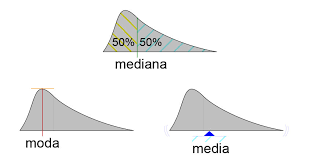

In [ ]:
# --- Descripción general ---
df.describe()

# --- Medidas de tendencia central ---
media = df['importe'].mean() #Valor Promedio
mediana = df['importe'].median() #Valor Central
moda = df['importe'].mode()[0] #Valor que s erepite más veces

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")


Media: 7730.08
Mediana: 6702.00
Moda: 4435.00


**6**. Distribución de variables

Tipo de distribución: El histograma muestra cómo se distribuyen los valores de importe. El eje X representa los montos de las ventas, y el eje Y indica la frecuencia (cantidad de operaciones dentro de cada rango de importe). Se observa que la mayoría de las ventas se concentran en importes bajos, con una caída gradual hacia valores altos, lo que evidencia una distribución sesgada positivamente, típica del comercio minorista.

✅ 📊 Histograma del importe

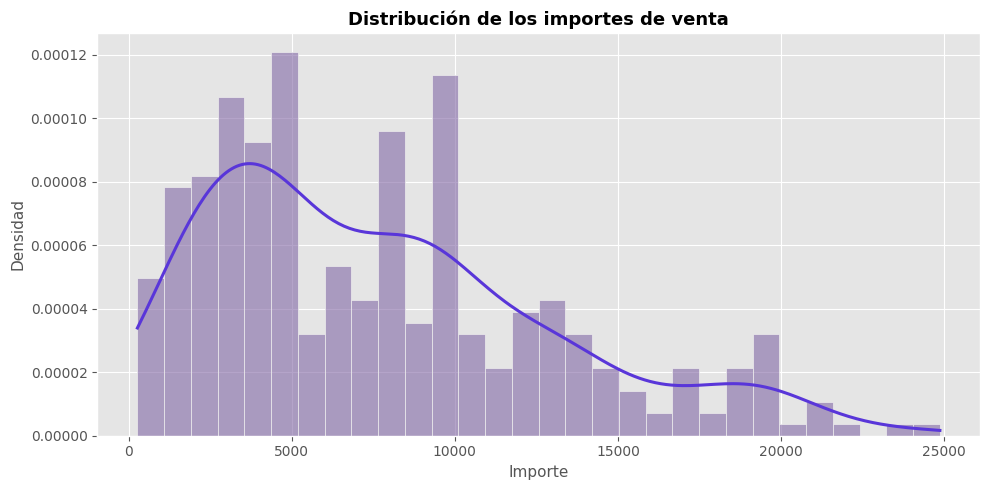

In [ ]:
# --- Histograma del importe ---
plt.figure(figsize=(10, 5))

# Histograma
sns.histplot(
    df['importe'],
    bins=30,
    color="#8268A6",  # violeta medio
    stat="density",
    alpha=0.6
)

# KDE manual para evitar errores
data = df['importe'].dropna()
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 300)
kde_vals = kde(x_vals)

plt.plot(x_vals, kde_vals, color="#5936D9", linewidth=2.2)  # violeta fuerte (contraste)

plt.title("Distribución de los importes de venta", fontsize=13, weight='bold')
plt.xlabel("Importe", fontsize=11)
plt.ylabel("Densidad", fontsize=11)
plt.tight_layout()
plt.show()


✅ 📦 Boxplot del importe

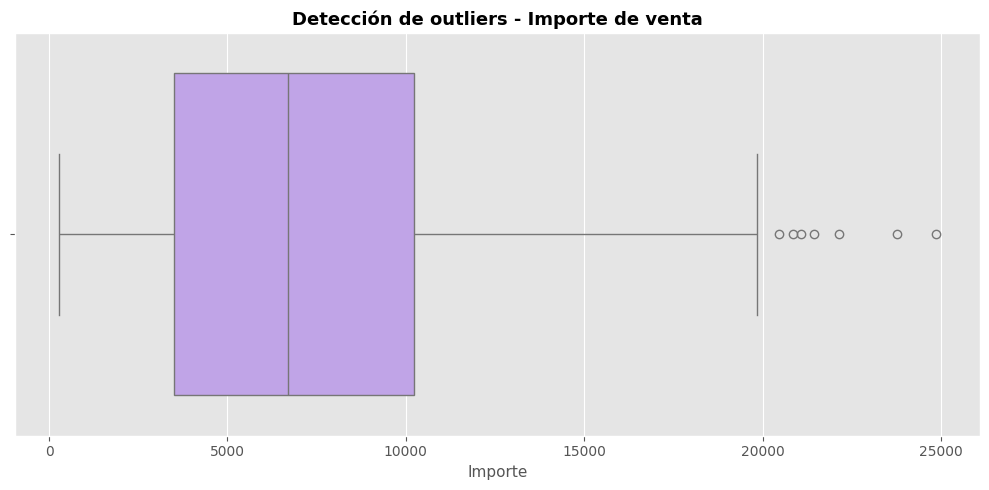

In [ ]:
# --- Boxplot para detección de outliers ---
plt.figure(figsize=(10, 5))

sns.boxplot(
    x=df['importe'],
    color="#BE99F2"   # violeta claro
)

plt.title("Detección de outliers - Importe de venta", fontsize=13, weight='bold')
plt.xlabel("Importe", fontsize=11)
plt.tight_layout()
plt.show()


✅ Boxplot por Medio de Pago

/tmp/ipython-input-155357982.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


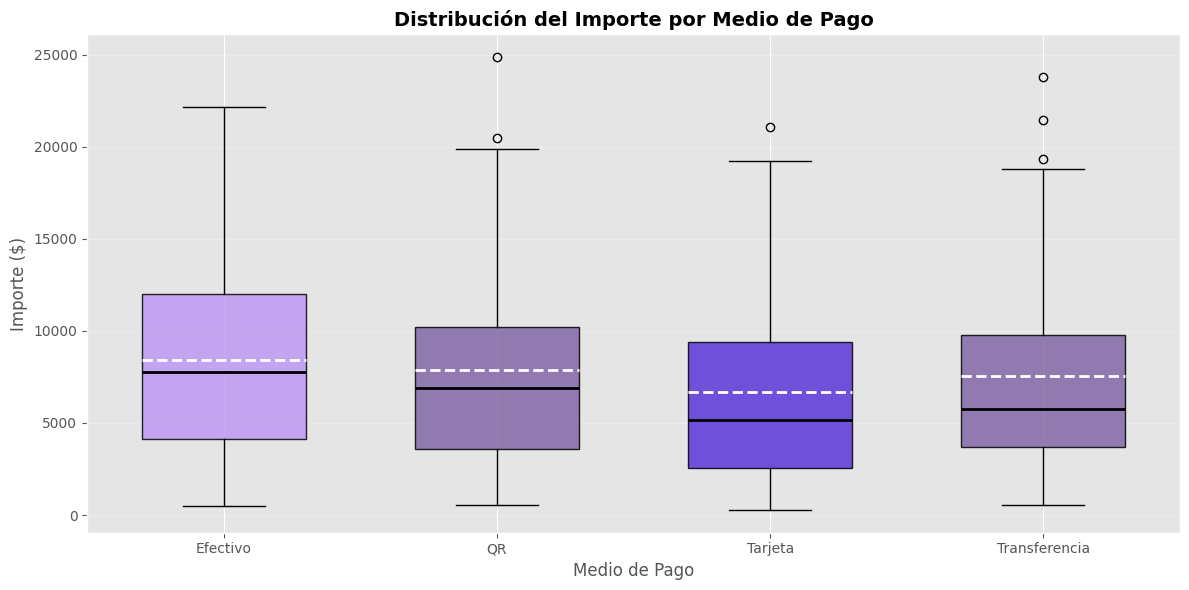

In [ ]:
# --- Gráfico: Boxplot de Importe por Medio de Pago ---

plt.figure(figsize=(12, 6))

# Medios de pago ordenados
medios = ['efectivo', 'qr', 'tarjeta', 'transferencia']
medios_labels = ['Efectivo', 'QR', 'Tarjeta', 'Transferencia']

# Extraer los datos por categoría
datos_boxplot = [df[df['medio_pago'] == medio]['importe'].values for medio in medios]

# Paleta ajustada a los colores del proyecto
colores = ['#BE99F2', '#8268A6', '#5936D9', '#8268A6']

# Crear el boxplot
bp = plt.boxplot(
    datos_boxplot,
    labels=medios_labels,
    patch_artist=True,
    showmeans=True,
    meanline=True,
    widths=0.6
)

# Colorear cada caja del boxplot
for patch, color in zip(bp['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.85)

# Personalizar medianas
for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# Personalizar medias
for mean in bp['means']:
    mean.set_color('white')
    mean.set_linewidth(2)

# Títulos y ejes
plt.title("Distribución del Importe por Medio de Pago", fontsize=14, fontweight='bold')
plt.ylabel("Importe ($)", fontsize=12)
plt.xlabel("Medio de Pago", fontsize=12)
plt.grid(True, alpha=0.25, axis='y')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


📦 ¿Qué muestra un boxplot?

El boxplot resume la distribución de una variable numérica (en este caso, el importe de venta) usando cinco valores estadísticos clave:
| Elemento                                  | Significado                                                                                                          |
| ----------------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **Caja (box)**                            | Representa el rango entre el **1er cuartil (Q1)** y el **3er cuartil (Q3)**, es decir, el 50 % central de los datos. |
| **Línea dentro de la caja**               | Es la **mediana** (el valor central de todos los importes).                                                          |
| **Bigotes (líneas que salen de la caja)** | Indican el rango típico de los datos (hasta 1.5 × el rango intercuartílico).                                         |
| **Puntos fuera de los bigotes**           | Son los **outliers** — valores que se alejan significativamente del resto.                                           |


✅ Dispersión Importe vs Cantidad

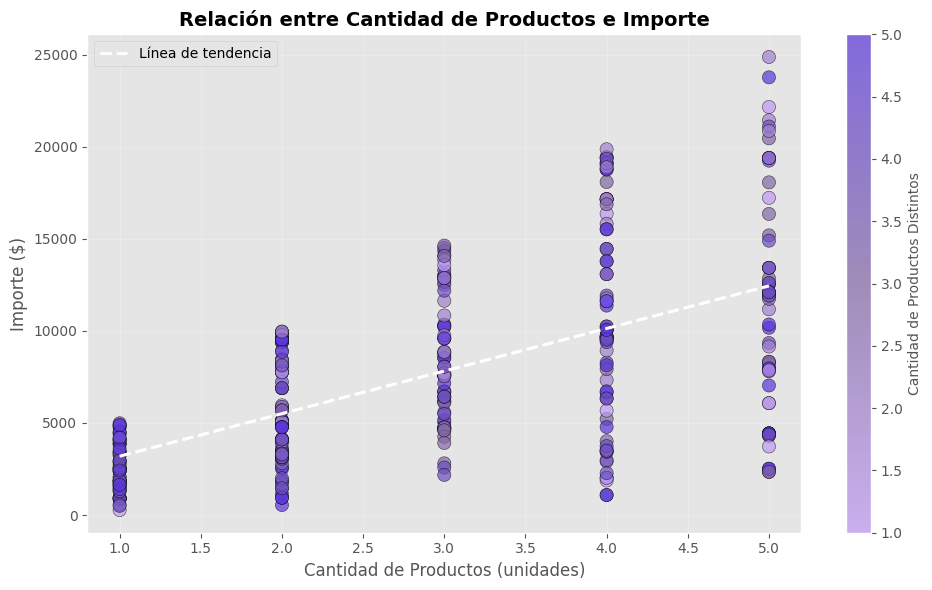

In [ ]:
# --- Gráfico: Dispersión entre Cantidad e Importe ---

# Crear variable auxiliar: cantidad de ítems distintos por venta
df['items_distintos'] = df.groupby('id_venta')['id_producto'].transform('nunique')

plt.figure(figsize=(10, 6))

# Colores usando tu paleta: transformamos a un mapa continuo
from matplotlib.colors import LinearSegmentedColormap

paleta_personal = LinearSegmentedColormap.from_list(
    "aurelion_palette",
    ['#BE99F2', '#8268A6', '#5936D9']
)

scatter = plt.scatter(
    df['cantidad'],
    df['importe'],
    c=df['items_distintos'],
    cmap=paleta_personal,
    alpha=0.7,
    s=90,
    edgecolors='black',
    linewidth=0.4
)

# --- Línea de tendencia ---
z = np.polyfit(df['cantidad'], df['importe'], 1)
p = np.poly1d(z)
x_sorted = np.sort(df['cantidad'])
plt.plot(x_sorted, p(x_sorted), "white", linewidth=2.2, linestyle='--', label='Línea de tendencia')

# --- Títulos y estilo ---
plt.title("Relación entre Cantidad de Productos e Importe", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad de Productos (unidades)", fontsize=12)
plt.ylabel("Importe ($)", fontsize=12)

plt.grid(True, alpha=0.25)
plt.legend(fontsize=10)

# --- Barra de color ---
cbar = plt.colorbar(scatter)
cbar.set_label("Cantidad de Productos Distintos", fontsize=10)

plt.tight_layout()
plt.show()


7. Análisis de correlaciones

Un mapa de correlación (heatmap) permite visualizar cómo se relacionan entre sí las variables numéricas del dataset. La correlación mide la fuerza y dirección de una relación lineal entre dos variables:

+1 → correlación positiva perfecta (si una sube, la otra también).

0 → sin relación lineal.

–1 → correlación negativa perfecta (si una sube, la otra baja).

En este análisis se incluyeron las variables importe, cantidad y precio_unitario, por ser las de mayor relevancia cuantitativa dentro del negocio. El objetivo es identificar si los montos de venta (importe) dependen más del precio unitario o de la cantidad vendida, lo que ayuda a interpretar si las ventas crecen por volumen o por precio.

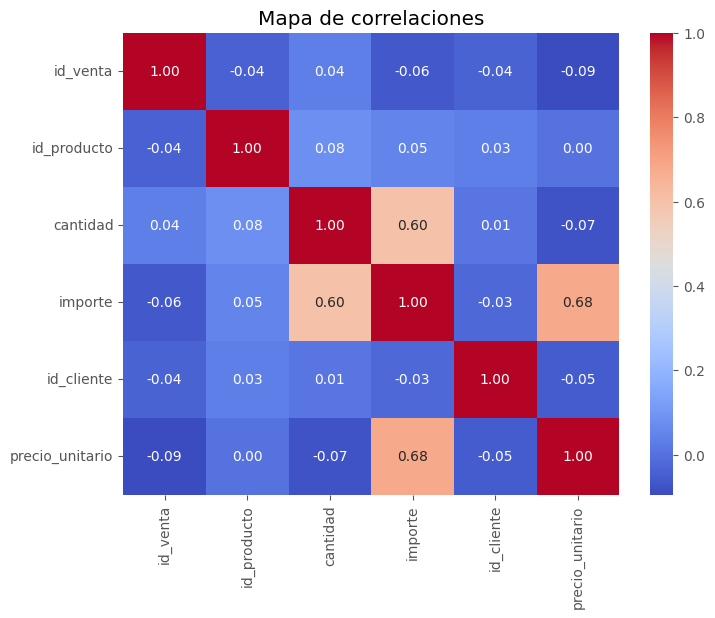

In [ ]:
# --- Correlación entre variables numéricas ---
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones")
plt.show()


📊 Conclusión del análisis

El mapa muestra una alta correlación positiva entre importe y cantidad, lo que indica que los montos de venta aumentan principalmente cuando se venden más unidades (efecto volumen). En cambio, la correlación entre importe y precio_unitario es moderada o baja, lo que sugiere que el valor del producto influye menos en el total vendido que la cantidad comercializada.

8. Identificación de outliers (valores atípicos)

Los outliers son valores que se alejan mucho del resto de los datos, y pueden deberse a errores de carga o a eventos excepcionales (como una venta inusualmente grande).
El Z-score, que mide cuántas desviaciones estándar está cada valor respecto a la media

In [ ]:
# --- Detección de outliers con Z-score ---
from scipy import stats

z_scores = np.abs(stats.zscore(df['importe'].dropna()))
outliers = df[z_scores > 3]
print(f"Cantidad de outliers detectados en 'importe': {outliers.shape[0]}")


# Cuáles son los dos importes que se salen del rango normal

outliers[['id_venta', 'importe']]


Cantidad de outliers detectados en 'importe': 2


,id_venta,importe
141,50,23760
208,75,24865


9. Gráficos representativos

1️⃣ Ventas por categoría

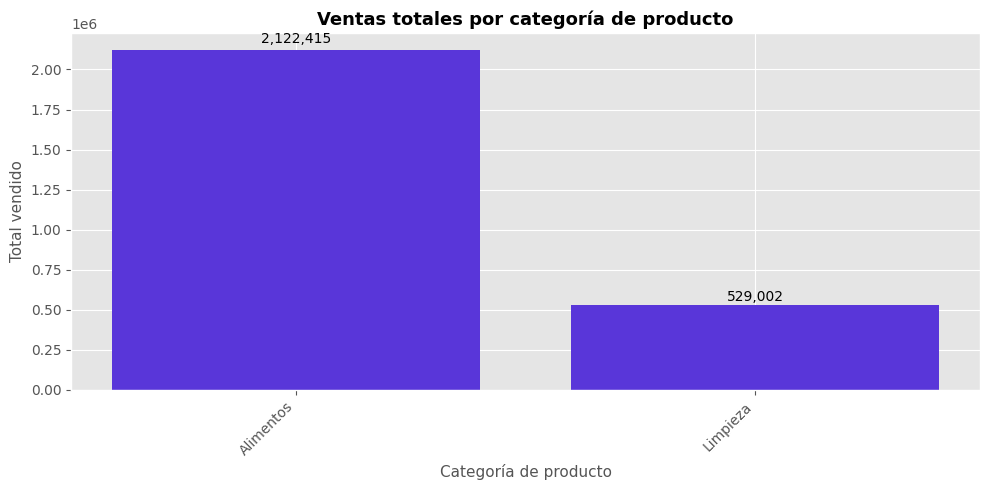

In [ ]:
# --- 1. Ventas por categoría de producto ---
plt.figure(figsize=(10,5))

data_cat = df.groupby('categoria')['importe'].sum().sort_values(ascending=False)

bars = plt.bar(data_cat.index, data_cat.values, color='#5936D9')

plt.title("Ventas totales por categoría de producto", fontsize=13, weight='bold')
plt.ylabel("Total vendido", fontsize=11)
plt.xlabel("Categoría de producto", fontsize=11)
plt.xticks(rotation=45, ha='right')

# --- Agregar etiquetas arriba de cada barra ---
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + (yval * 0.01),
        f"{yval:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


2️⃣ Top 10 ciudades por ventas

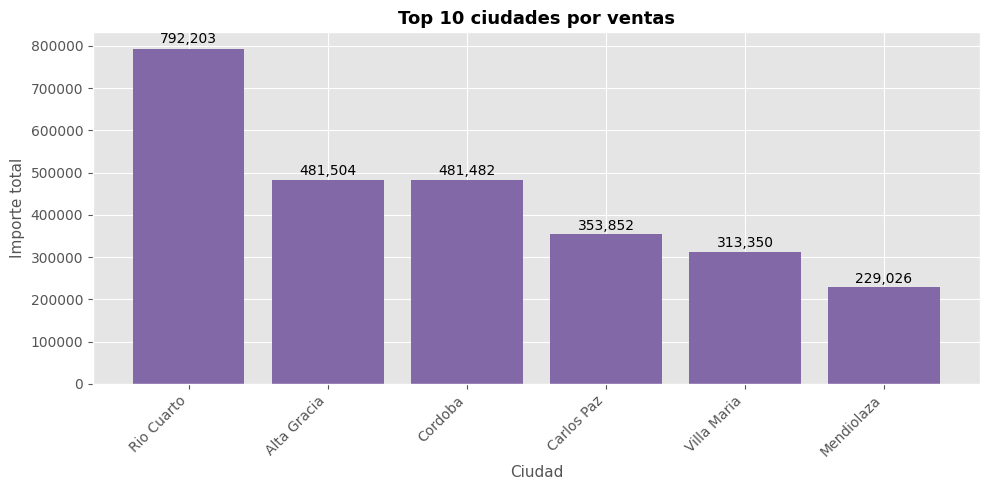

In [ ]:
# --- 2. Ventas por ciudad ---
plt.figure(figsize=(10,5))

data_city = df.groupby('ciudad')['importe'].sum().nlargest(10)

bars = plt.bar(data_city.index, data_city.values, color='#8268A6')

plt.title("Top 10 ciudades por ventas", fontsize=13, weight='bold')
plt.ylabel("Importe total", fontsize=11)
plt.xlabel("Ciudad", fontsize=11)
plt.xticks(rotation=45, ha='right')

# --- Agregar etiquetas arriba de cada barra ---
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + (yval * 0.01),
        f"{yval:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


3️⃣ Evolución temporal

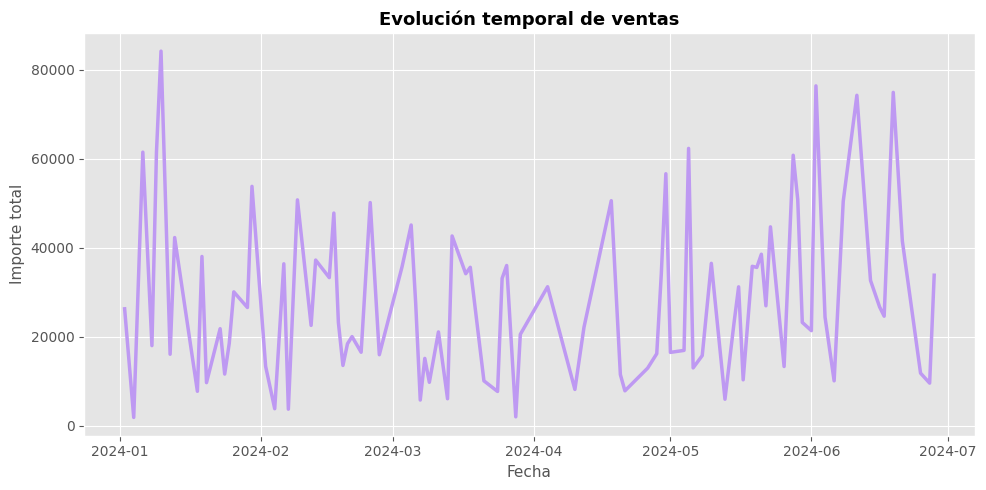

In [ ]:
# --- 3. Evolución temporal de ventas ---
plt.figure(figsize=(10,5))

plt.plot(
    df.groupby('fecha')['importe'].sum(),
    color='#BE99F2',
    linewidth=2.5
)

plt.title("Evolución temporal de ventas", fontsize=13, weight='bold')
plt.ylabel("Importe total", fontsize=11)
plt.xlabel("Fecha", fontsize=11)

plt.tight_layout()
plt.show()


10. Interpretación de resultados (orientado al problema)

Las categorías con mayor volumen de ventas son las que impulsan el rendimiento total del negocio.

La distribución de importes muestra una ligera asimetría, indicando ventas con montos muy altos poco frecuentes (outliers).

Existen correlaciones positivas entre cantidad, precio unitario e importe, lo que valida la coherencia de los datos.

La variabilidad en las ciudades sugiere posibles oportunidades comerciales en zonas de baja venta.

📊 Variables principales del análisis

Para el análisis de correlaciones y distribución se seleccionaron las variables más relevantes del negocio, aquellas que influyen directamente en el desempeño comercial y permiten detectar patrones de comportamiento:

| Variable            | Descripción                                            | Motivo de selección                                                                |
| ------------------- | ------------------------------------------------------ | ---------------------------------------------------------------------------------- |
| **importe**         | Monto total de cada venta (cantidad × precio unitario) | Es la métrica principal de ingresos y el indicador base del rendimiento económico. |
| **cantidad**        | Número de unidades vendidas por producto               | Permite observar la relación entre volumen y facturación.                          |
| **precio_unitario** | Precio por unidad de producto                          | Mide la política de precios y ayuda a identificar su relación con la demanda.      |
| **categoria**       | Clasificación del producto (Alimentos, Limpieza, etc.) | Posibilita analizar diferencias de comportamiento entre grupos de productos.       |
| **medio_pago**      | Forma de pago utilizada (efectivo, tarjeta, etc.)      | Permite explorar si ciertos medios de pago se asocian a mayores montos de venta.   |
| **fecha**           | Fecha de la transacción                                | Ayuda a estudiar la evolución temporal y detectar estacionalidad.                  |


11. Guardar base limpia

In [ ]:
#Tabla corregida de Productos
productos.to_csv("productos_corregido.csv", index=False)
print("✅ Archivo 'productos_corregido.csv' guardado correctamente")

✅ Archivo 'productos_corregido.csv' guardado correctamente


In [ ]:
df.to_csv("ventas_limpias.csv", index=False)
print("✅ Archivo 'ventas_limpias.csv' exportado correctamente.")


✅ Archivo 'ventas_limpias.csv' exportado correctamente.
